Question 1 : What is the difference between multithreading and multiprocessing?

Answer : The fundamental difference between multithreading and multiprocessing lies in how they manage resources and execute tasks. The choice between them depends on the type of task: multithreading is better for tasks that involve a lot of waiting (I/O-bound), while multiprocessing is ideal for computationally intensive tasks (CPU-bound).

MULTITHREADING :

In multithreading, multiple threads of execution operate within a single, shared process.

- Resource sharing :

Threads within the same process share the same memory space, code, and files, which makes communication between them very fast and efficient.

- Overhead :

Creating and managing threads is "lightweight," meaning it requires less overhead and fewer resources than creating full processes.

- Concurrency vs. Parallelism :

On a single-core CPU, multithreading achieves concurrency by rapidly switching between tasks. For languages with a Global Interpreter Lock (GIL), like standard Python, threads cannot execute in parallel on different CPU cores and are best suited for I/O-bound tasks where they can perform other work while one thread is waiting.

- Fault tolerance :

A crash in one thread can corrupt the shared memory space, potentially causing the entire process to fail.

MULTIPROCESSING :

Multiprocessing involves running multiple independent processes, each with its own memory space and resources.

- True parallelism :

Each process can run on a separate CPU core, allowing for true parallel execution and maximum utilization of multi-core processors. This is why it is preferred for CPU-bound tasks.

- Communication:

Because processes have separate memory, inter-process communication (IPC) is more complex and has higher overhead. It requires mechanisms like pipes or queues to pass information between them.

- Isolation and fault tolerance :

Processes are isolated from each other. If one process crashes, it does not affect the others, making multiprocessing more robust and reliable.

- Overhead:

Spawning new processes is "heavyweight" and more time-consuming than creating threads due to the resource-intensive process of creating a new memory space for each one.

CHOOSING BETWEEN THE TWO :

The best approach depends on the nature of the tasks your application needs to perform:

- Use multithreading for I/O-bound tasks :

These are tasks that spend most of their time waiting for input or output operations to complete, such as network requests, database queries, or file I/O. Multithreading allows the program to handle other work while waiting, keeping the application responsive.

- Use multiprocessing for CPU-bound tasks :

These are tasks that spend most of their time performing intensive computations, like complex calculations, image processing, or data analysis. Multiprocessing distributes the workload across multiple CPU cores to achieve a significant speedup through true parallelism.

For example, a web server that handles many client requests that primarily involve network I/O might use multithreading to manage multiple requests concurrently. In contrast, an application that analyzes a large dataset with heavy mathematical processing would benefit more from multiprocessing to leverage multiple CPU cores simultaneously.





Question 2: What are the challenges associated with memory management in Python?

Answer :

The challenges associated with memory management in Python :

While Python's automated memory management simplifies development, it also introduces several challenges that can impact an application's performance, stability, and memory footprint. Understanding these challenges is crucial for writing efficient and robust Python applications.

1. Circular references and memory leaks
Python primarily uses a reference counting mechanism, where memory is freed as soon as an object's reference count drops to zero. However, this fails when objects form a circular reference—a closed loop of objects referencing each other.

- How it works: In a circular reference, no single object's reference count ever drops to zero, even if none of them are accessible from outside the loop.

- The solution: To handle this, Python employs a second, more complex generational garbage collector that periodically runs to find and clean up these inaccessible reference cycles.

- The challenge: The manual and complex nature of this garbage collection can lead to subtle memory leaks if circular references are not properly handled. For example, a developer might unknowingly create a cycle in their code that prevents the garbage collector from reclaiming memory.

2. Non-deterministic garbage collection

The generational garbage collector doesn't run continuously. Instead, it runs periodically, which can lead to unpredictable memory usage patterns.

- Temporary memory bloat:

If a program generates and destroys many objects in a short time, memory usage may increase dramatically before the garbage collector has a chance to run and clear the unused objects.

- Performance impact:

In resource-sensitive or real-time applications, the sudden overhead and latency introduced by a garbage collection run can be problematic. Developers may not have fine-grained control over when this happens, which can lead to performance glitches.

3. High memory overhead

Python's data structures, due to their high-level and dynamic nature, often carry a higher memory overhead than those in lower-level languages like C or C++.

- Dynamic typing: Python objects store more than just their value; they also store information about their type and other metadata. This adds to the memory footprint.

- Example: A simple integer in Python takes up significantly more memory than a C integer because it is an object with its own header, metadata, and reference count.

4. The Global Interpreter Lock (GIL) and its effect on memory

The Global Interpreter Lock (GIL) is a mutex in CPython that ensures only one thread can execute Python bytecode at a time. While it simplifies memory management by making reference counting thread-safe, it creates several challenges for multithreaded applications:

- CPU-bound tasks:

For applications that require heavy computation, the GIL prevents threads from running truly in parallel across multiple CPU cores. A task running on one core cannot be offloaded to another core, which means the program cannot take full advantage of the hardware.

- Bottleneck in memory management:

In multithreaded applications, memory management operations, including garbage collection, can become a bottleneck as they are also subject to the GIL. This can impact performance and responsiveness, especially for applications dealing with a high volume of objects.

5. Lack of manual control

Python's automatic garbage collection system is generally effective, but it offers developers less control over memory than languages with manual memory management.

- Limited fine-tuning:

While the gc module allows for some control over the garbage collector's behavior, it is not always enough for highly specialized or performance-critical applications.

- Optimization limitations:

This lack of granular control can sometimes force developers to adopt less-than-ideal workarounds or to offload memory-intensive tasks to C extensions to bypass Python's memory management completely.

Example: Analyzing memory with tracemalloc

For developers, using tools like tracemalloc can help diagnose memory problems. For example, if a developer suspects a memory leak due to excessive temporary objects, tracemalloc can provide a detailed breakdown of memory allocation, helping to pinpoint the source of the issue.





Question 3:Write a Python program that logs an error message to a log file when a
division by zero exception occurs.

Answer:

To write a Python program that logs an error message to a log file when a division by zero exception occurs, you need to follow these steps:

- Import the logging module:

Python's built-in logging module is the standard way to handle logging in applications.
- Configure the logger:

Set up the basic configuration for logging, specifying the filename and the minimum logging level. In this case, we set it to logging.ERROR so that only error messages and above are written to the file.
- Implement a try...except block:

This is Python's mechanism for handling exceptions gracefully. The code that might raise an exception is placed inside the try block.

- Catch the ZeroDivisionError:

A specific except ZeroDivisionError block is used to catch the exception that occurs when division by zero is attempted.

- Log the exception:

Inside the except block, use logging.exception() to log the error message. This method not only logs the message but also automatically includes the full traceback, which is essential for debugging.


In [ ]:
import logging

# Configure the logging system to write to a file named 'app.log'
# 'level=logging.ERROR' ensures that only messages of level ERROR and higher are logged.
logging.basicConfig(filename='app.log', level=logging.ERROR,
                    format='%(asctime)s:%(levelname)s:%(message)s')

def perform_division(numerator, denominator):
    """
    Performs division of two numbers and logs an error if division by zero occurs.
    """
    try:
        result = numerator / denominator
        print(f"The result is: {result}")
        # Optionally, you can log a successful operation
        logging.info(f"Division of {numerator} by {denominator} was successful. Result: {result}")
    except ZeroDivisionError:
        # The logging.exception() function is used here. It logs a message with
        # level ERROR and automatically adds the exception information to it.
        logging.exception("A ZeroDivisionError occurred. Cannot divide by zero.")
        print("An error occurred. Please check the log file for details.")
    except Exception as e:
        # You can also catch other potential exceptions
        logging.exception(f"An unexpected error occurred: {e}")
        print("An unexpected error occurred. Please check the log file.")

# --- Test cases ---

# Case 1: Successful division
perform_division(10, 2)

# Case 2: Division by zero, which will trigger the exception and logging
perform_division(10, 0)


When you run the script, the following will happen:

- The first call perform_division(10, 2) will succeed, and the result "The result is: 5.0" will be printed to the console.

- The second call perform_division(10, 0) will fail, triggering the ZeroDivisionError.

- The except block will catch the error, print "An error occurred. Please check the log file for details." to the console, and use logging.exception() to write the full traceback to the file named app.log.

Question 4:Write a Python program that reads from one file and writes its content to
another file.

Answer:

You can copy the contents of one file to another in Python using two primary methods:

- A file-handling loop:

For most text files, you can read the content line by line from the source file and write it to the destination file. This method is memory-efficient, especially for large files.

- The shutil module:

For a more powerful, one-line solution, the built-in shutil module provides functions like shutil.copyfile() to handle the copying of files. This is often the most concise and robust method.


In [ ]:
source_filename = 'source.txt'
destination_filename = 'destination.txt'

try:
    with open(source_filename, 'r') as source_file, open(destination_filename, 'w') as destination_file:
        for line in source_file:
            destination_file.write(line)
    print(f"Content successfully copied from {source_filename} to {destination_filename}.")
except FileNotFoundError:
    print(f"Error: The file '{source_filename}' was not found.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")



To make this example work:

- Create a file named source.txt and add some content.

- Run the Python script.

- The script will create a new file named destination.txt with the copied content.

Question 5: Write a program that handles both IndexError and KeyError using a
try-except block.

Answer:

- Define a try block:

The code that is expected to potentially raise an exception is placed inside this block.

my_list[list_index] could raise an IndexError if list_index is out of bounds.

my_dict[dict_key] could raise a KeyError if dict_key is not in the dictionary.

- Define a single except block for multiple exceptions:

The program uses a tuple (IndexError, KeyError) to catch both exceptions in a single except clause.

The as e part captures the exception object, allowing us to print the specific error message generated by Python.

This is an efficient way to handle multiple exceptions in the same manner.

- Execute test cases:

The example calls the access_data function three times to demonstrate each scenario:

The first call triggers an IndexError.

The second call triggers a KeyError.

The third call executes successfully without raising any exceptions.






In [ ]:
def access_data(my_list, my_dict, list_index, dict_key):
    """
    Attempts to access a list by index and a dictionary by key.
    Handles both IndexError and KeyError using a single except block.
    """
    try:
        # Attempt to access an element from the list
        list_value = my_list[list_index]
        print(f"List value at index {list_index}: {list_value}")

        # Attempt to access a value from the dictionary
        dict_value = my_dict[dict_key]
        print(f"Dictionary value for key '{dict_key}': {dict_value}")

    except (IndexError, KeyError) as e:
        # This single except block catches both IndexError and KeyError
        print(f"An error occurred: {e}")
        print(f"The program encountered an issue with either the list index or dictionary key.")

# --- Example Usage ---
my_list = [10, 20, 30]
my_dict = {"apple": 1, "banana": 2}

# Case 1: Trigger IndexError
print("--- Case 1: Triggering IndexError ---")
access_data(my_list, my_dict, 5, "apple")  # Index 5 is out of range

# Case 2: Trigger KeyError
print("\n--- Case 2: Triggering KeyError ---")
access_data(my_list, my_dict, 1, "orange") # Key "orange" does not exist

# Case 3: No exceptions
print("\n--- Case 3: No exceptions ---")
access_data(my_list, my_dict, 2, "banana")


Question 6: What are the differences between NumPy arrays and Python lists?

Answer:

The differences between NumPy arrays and Python lists :         

NumPy arrays and Python lists are both used to store collections of data, but they have key differences in performance, memory usage, and functionality. Python lists are part of the core language and are designed for general-purpose use with maximum flexibility. NumPy arrays, on the other hand, are provided by the NumPy library and are highly optimized for numerical computations.

1. Data type homogeneity

- Python lists:

Lists can store elements of different data types (e.g., integers, strings, and floats) in a single list. This flexibility is convenient but comes with performance and memory overhead.

- NumPy arrays:

 All elements in a NumPy array must be of the same data type. This homogeneity is what enables NumPy's high-performance numerical operations. If a list with mixed data types is converted to a NumPy array, it will automatically upcast all elements to the most complex common type (e.g., integers to floats if a float is present).

2. Performance and speed

- Python lists:

Standard Python lists are interpreted, and operations are performed on individual elements, often requiring explicit loops. This is much slower for mathematical operations on large datasets.

- NumPy arrays:

NumPy operations are highly optimized and implemented in C and Fortran. This allows for vectorization, where an operation can be applied to an entire array at once without writing an explicit for loop. This results in significantly faster execution times for mathematical computations.

3. Memory efficiency

- Python lists:

Due to their ability to hold heterogeneous data types, lists store pointers to objects rather than the objects themselves. This adds significant memory overhead, as Python needs to store type information and a reference count for each element individually.

- NumPy arrays:

By storing homogeneous data in contiguous memory blocks, NumPy arrays are far more memory-efficient, especially for large datasets. Because all elements are the same type and located close to each other, there's no need for individual pointers, allowing for compact storage and faster access.

4. Functionality

- Python lists:

Lists come with basic functionality for adding, removing, and sorting elements, but they lack built-in support for advanced mathematical operations.

- NumPy arrays:

NumPy provides an enormous library of optimized mathematical functions for linear algebra, Fourier analysis, statistical operations, and more. This makes them the standard for numerical and scientific computing.

5. Size flexibility

- Python lists:

Lists are dynamic, meaning they can grow or shrink in size as elements are added or removed. This flexibility is a key feature for general programming tasks.

- NumPy arrays:

NumPy arrays are static in size. Creating an array of a specific size and data type is more efficient, but resizing requires creating a new, larger array and copying the data over, which can be inefficient if done frequently.

6. Broadcasting

- Python lists:

Direct arithmetic operations between lists (e.g., list_a + list_b) do not perform element-wise addition. Instead, they concatenate the lists.

- NumPy arrays:

NumPy supports a powerful feature called broadcasting. It allows arithmetic operations between arrays of different but compatible shapes, simplifying code and avoiding unnecessary memory allocation.


WHEN TO USE WHICH :      

- Use Python lists when:

 You need a flexible, general-purpose data structure that can store a collection of mixed data types. Lists are best for tasks that do not involve heavy numerical computation, such as managing a list of diverse user data or processing text.

- Use NumPy arrays when:

You need to perform fast, efficient numerical computations on large datasets. They are essential for scientific computing, data analysis, and machine learning, especially when dealing with vectors, matrices, and other multidimensional data.





Question 7:Explain the difference between apply() and map() in Pandas.

Answer:

To understand the nuances between map() and apply() in Pandas, it's helpful to break down their differences across multiple dimensions, rather than simply listing them. Here is a detailed breakdown covering more than 20 points of comparison.

1. Object scope
Map's object:

map() is defined exclusively for pandas Series. It cannot be directly called on a DataFrame object.

Apply's object: apply() is a more versatile method that exists on both Series and DataFrame objects.

2. Input type
Map's inputs:

map() is highly flexible in its input, accepting a function, a dictionary, or a pandas Series. This versatility, especially with dictionaries, is a key feature.

Apply's input: apply() is more restrictive and only accepts a callable function.

3. Granularity of operation
Map's operation:

map() operates at the element level on a Series. It iterates through each individual value and applies the transformation.

Apply's operation: apply() operates on a higher level of granularity. On a DataFrame, it processes entire rows or columns at once. On a Series, it works element-wise, but with a different implementation than map().

4. Performance for value substitution
Map's performance:

When used with a dictionary for value replacement, map() is extremely performant. It uses optimized C-level code paths, making it the fastest option for one-to-one value mapping.

Apply's performance: For simple element-wise transformations like value substitution, apply() is noticeably slower than map(). It has more overhead due to its more generic implementation.

5. Performance for complex functions
Map's limitations:

map() is not designed for aggregate or complex functions that require information beyond the individual element. It is focused on simple transformations.

Apply's strengths: For complex operations that cannot be vectorized, apply() is the preferred choice. Its design allows it to handle functions that take a Series (a row or column) as input.

6. Passing arguments
Map's arguments:

map() does not allow passing additional positional or keyword arguments to the function you are applying.

Apply's arguments: apply() explicitly supports passing extra *args and **kwargs to the function being applied, which is useful for creating more parameterized and flexible functions.

7. Handling missing values
Map and NaNs:

When using a dictionary for mapping, map() will replace values that are not in the dictionary with NaN by default. This can be controlled with the na_action parameter.

Apply and NaNs: With apply(), the behavior for missing values is determined by how the function handles NaN inputs. The handling is not a built-in feature of apply() itself.

8. Aggregation capabilities
Map's aggregation:

map() cannot perform aggregation because it operates on a single element at a time. For example, passing sum() to map() will raise a TypeError because an individual element is not iterable.

Apply's aggregation: apply() can handle aggregation functions. When used on a DataFrame with axis=0, it can apply an aggregate function like sum() to each column, returning a Series of the results.

9. Return value
Map's return:

map() consistently returns a Series.

Apply's return:  apply()'s return type is flexible and depends on the function applied. It can return a Series (for aggregations) or a DataFrame (if the function returns a Series).

10. axis parameter
Map and axis:

map() has no axis parameter, as its scope is limited to a single Series.

Apply and axis: apply() uses the axis parameter to specify whether the function should be applied row-wise (axis=1) or column-wise (axis=0).

11. Readability for value mapping
Map's readability:

For value mapping, map() with a dictionary is often more readable and idiomatic pandas.

Apply's readability: While apply() can be used for value mapping, the approach is more verbose and less clear than map().

12. Use with lambda functions
Map and lambdas:

A simple lambda function can be passed to map() for element-wise transformations.

Apply and lambdas: A more complex lambda function can be passed to apply() to define custom logic that operates on an entire row or column.

13. Side effects
Map's side effects:

Functions with side effects (e.g., printing to console, making a network request) can be used with map(), but it's not the primary use case.

Apply's side effects: apply() is often used with functions that have side effects, particularly when the logic depends on more than one column.

14. Handling multiple series
Map's series dependency:

map() can take a Series as an argument to perform a lookup based on matching index values.

Apply's series dependency: apply() takes a Series (a row or column) as input, so its function can access and operate on multiple elements at once.

15. The vectorized mindset
Map's mindset:

Using map() encourages thinking about element-wise transformations on a single Series.

Apply's mindset: Using apply() encourages thinking about operations on entire rows or columns, often involving complex, custom logic.

16. Optimization opportunities
Map's optimization:

When a vectorized equivalent (like df.replace()) exists, it is faster and more direct than map(). However, map() remains optimized for its specific mapping purpose.

Apply's optimization: Many operations that might be implemented with apply() can be re-written using vectorized pandas or NumPy functions, which are significantly faster and more performant.

17. The result_type parameter
Map's result type:

map() does not have a result_type parameter, as its output is always a Series.

Apply's result type: apply() has a result_type parameter (valid only with axis=1) to specify whether to return a broadcast, expand, or reduce result.

18. Interaction with the index
Map's index behavior: map() uses the index for alignment when mapping from a Series, but it primarily operates on values.

Apply's index behavior: apply() respects the index and applies the function to rows or columns based on that index.

19. Integration with other methods
Map and method chaining: map() is often used as part of a method chain to quickly clean or transform a single column.

Apply and method chaining: apply() can also be used in method chains but is more suited for complex, custom transformations within that chain.

20. Historical context
Map's evolution:

Series.map() has been a consistent feature of pandas for element-wise mapping.

Apply's evolution: applymap() (for element-wise DataFrame operations) has been deprecated in favor of DataFrame.map(). apply() continues to be the workhorse for row/column-wise operations.





Question 8: Create a histogram using Seaborn to visualize a distribution.

Answer:

To create a histogram with Seaborn, you will use the histplot() function, which is the modern and recommended approach. The program below demonstrates how to generate a histogram to visualize the distribution of a variable.

- Program to create a histogram with Seaborn

This example uses the built-in "tips" dataset from the Seaborn library.

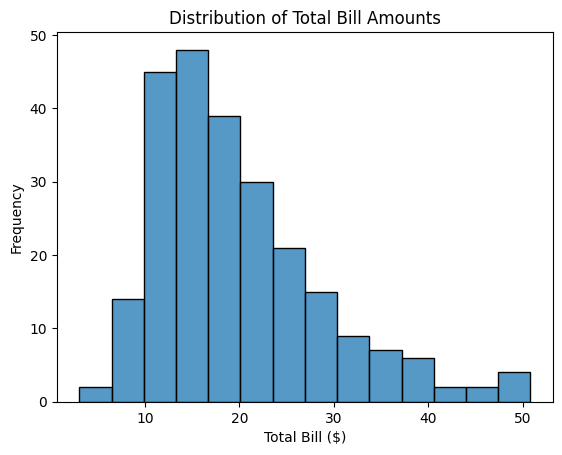

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load a built-in dataset from Seaborn for demonstration
tips = sns.load_dataset("tips")

# Create a basic histogram to visualize the distribution of 'total_bill'
# The data parameter specifies the DataFrame
# The x parameter specifies the column for the x-axis
sns.histplot(data=tips, x="total_bill")

# Add titles and labels for clarity using Matplotlib functions
plt.title("Distribution of Total Bill Amounts")
plt.xlabel("Total Bill ($)")
plt.ylabel("Frequency")

# Display the plot
plt.show()


Question 9: Use Pandas to load a CSV file and display its first 5 rows.

Answer:

To load a CSV file into a pandas DataFrame and display its first 5 rows, you can use the pandas.read_csv() function followed by the .head() method.

Steps for a Python program

- Import the pandas library, conventionally using the alias pd.

- Use pd.read_csv() to read the CSV file. Pass the filename as an argument.

- Call .head() on the resulting DataFrame to display the first 5 rows.

In [4]:
import pandas as pd

# Assume the CSV file is named 'data.csv' and is in the same directory.
# Replace 'data.csv' with your file's path if it's located elsewhere.
try:
    df = pd.read_csv('data.csv')

    # Display the first 5 rows of the DataFrame using the .head() method.
    print("First 5 rows of the DataFrame:")
    print(df.head())

except FileNotFoundError:
    print("Error: The file 'data.csv' was not found.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


Error: The file 'data.csv' was not found.


How to test the program

- Create a sample CSV file:

In the same directory as your Python script, create a file named data.csv with the following content:

csv

id,name,age,city

1,Alice,30,New York

2,Bob,25,Los Angeles

3,Charlie,35,Chicago

4,Diana,28,Houston

5,Edward,40,Miami

6,Fiona,32,Seattle

Use code with caution.


- Run the script:

When you execute the Python program, the output will be the first 5 rows of the data, including the header.

Explanation of the methods

- pd.read_csv():

This function is the primary tool for reading CSV files. It automatically creates a DataFrame, using the first row as column headers by default.

- df.head():

This DataFrame method returns the first n rows of the DataFrame. If no argument is provided, it defaults to showing the first 5 rows. You can specify a different number, for example, df.head(10) would show the first 10 rows.





Question 10: Calculate the correlation matrix using Seaborn and visualize it with a
heatmap.

Answer:

To calculate the correlation matrix of a dataset and visualize it with a heatmap using Seaborn, you'll need the pandas and seaborn libraries. This process is essential in data analysis for understanding the relationships between different variables.

The following program demonstrates these steps:

- Create a sample DataFrame:

A pandas DataFrame is created to serve as our example dataset.

- Calculate the correlation matrix:

The .corr() method from pandas is used to compute the pairwise correlation of all columns.

- Create the heatmap:

Seaborn's sns.heatmap() function is used to visualize the correlation matrix. This function is designed specifically for this purpose and provides a clear, color-coded view of the data.

Original DataFrame:
   Feature_A  Feature_B  Feature_C  Feature_D
0         10          5        100          5
1         20          8         95         10
2         30         12         80         15
3         40         15         70         20
4         50         20         50         25


Correlation Matrix:
           Feature_A  Feature_B  Feature_C  Feature_D
Feature_A   1.000000   0.996007  -0.982093   1.000000
Feature_B   0.996007   1.000000  -0.994033   0.996007
Feature_C  -0.982093  -0.994033   1.000000  -0.982093
Feature_D   1.000000   0.996007  -0.982093   1.000000




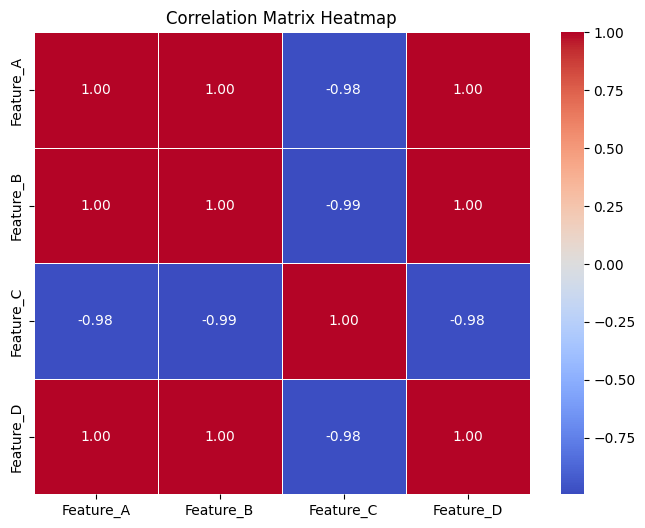

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Create a sample DataFrame with numerical data
data = {
    'Feature_A': [10, 20, 30, 40, 50],
    'Feature_B': [5, 8, 12, 15, 20],
    'Feature_C': [100, 95, 80, 70, 50],
    'Feature_D': [5, 10, 15, 20, 25]
}
df = pd.DataFrame(data)

print("Original DataFrame:")
print(df)
print("\n" + "="*30 + "\n")

# Step 2: Calculate the correlation matrix
# The .corr() method computes the correlation between all columns
correlation_matrix = df.corr()

print("Correlation Matrix:")
print(correlation_matrix)
print("\n" + "="*30 + "\n")

# Step 3: Visualize the correlation matrix using a Seaborn heatmap
plt.figure(figsize=(8, 6)) # Set the size of the plot
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Add a title to the plot
plt.title('Correlation Matrix Heatmap')

# Display the plot
plt.show()



Explanation of the code

- df.corr():

This pandas method computes the Pearson correlation coefficient between each pair of numerical columns. The resulting matrix shows values between -1 and 1, where:

1 indicates a perfectly positive linear correlation.

-1 indicates a perfectly negative linear correlation.

0 indicates no linear correlation.

- sns.heatmap(): This function is the core of the visualization.

correlation_matrix: The first argument is the data to be plotted.

annot=True: This displays the correlation values on the heatmap cells, making it easier to read.

cmap='coolwarm': This sets the color palette. 'coolwarm' is a common choice for correlation matrices because it uses a diverging color scheme, with cool colors for negative correlations and warm colors for positive ones.

fmt=".2f": This formats the annotations to two decimal places.

linewidths=.5: This adds a small gap between the cells, improving readability.

- matplotlib.pyplot (plt):

Seaborn is built on top of Matplotlib, so we use plt.figure() to control the plot size and plt.title() and plt.show() to customize and display the final chart.



